In [46]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [47]:
df = pd.read_csv('../data/mq_variants_intensity_cleaned.csv')
df = df[~df["Proteins"].str.contains(";", na=False)]

In [48]:
df.columns = [c.replace('_dyn_#', '').split('.')[0] for c in df.columns]

In [49]:
target_protein = "sp|Q8TD19|NEK9_HUMAN"
target_drug = "Alectinib"

In [50]:
def extract_concentration(col: str):
    """Extract numeric concentration from column name."""
    return int(col.split()[1].split("nM")[0])

In [51]:
columns = [col for col in df.columns if target_drug in col and "DMSO" not in col]
columns = sorted(columns, key=extract_concentration)
columns.extend(["Variant"])

In [52]:
columns[1:] = columns[0:len(columns)]
columns[0] = "Variant"
columns = columns[:len(columns) - 1]  # Remove the last column which is not needed

In [53]:
df_target = df[df["Proteins"] == target_protein][columns]

In [54]:
drug_columns = columns[1:]

In [55]:
df_target.dropna(subset=drug_columns, inplace=True)

In [56]:
df_target

,Variant,Alectinib 3nM,Alectinib 10nM,Alectinib 30nM,Alectinib 100nM,Alectinib 300nM,Alectinib 1000nM,Alectinib 3000nM,Alectinib 30000nM
97,.LGLDSEEDYYTPQKVDVPK.,0.095273,0.320353,0.589963,0.662604,0.433910,-1.340413,-1.026994,-2.224523
111,.LGLDSEEDYYTPQK.,0.249554,0.504875,0.433486,0.031914,-0.491066,-0.641645,-0.532654,-0.908406
147,.VSC+57.021GDEFTIAATDDNHIFAWGNGGNGR.,0.495985,1.461948,1.011063,0.811369,1.447513,-0.570747,-0.757506,-1.298720
152,.GWHTILIVEK.,0.385942,0.386378,0.664836,0.332926,1.435142,-0.316423,-0.431472,-0.357037
239,.VASEAPLEHKPQVEASSPR.,0.401598,0.481963,0.171370,0.334749,1.583011,-0.425974,0.233157,-0.192430
358,.QVC+57.021AGNTHFAVVTVEK.,0.800885,0.821741,1.266578,0.888423,1.559404,-0.741204,-0.993368,-1.024672
395,.PIFGSLHHVPDLSC+57.021R.,0.187844,0.224559,0.423914,0.025397,1.343106,-0.293569,-0.704925,-0.445662
398,.VTLLNAPTK.,-0.065347,0.195965,0.362807,0.389815,1.458697,-0.930252,-0.944215,-0.902935
407,.SSTVTEAPIAVVTSR.,0.438364,0.437944,0.838914,0.331490,0.984582,-0.826949,-0.846871,-0.895477
408,.LQQENLQIFTQLQK.,0.575610,0.783651,0.817847,0.910414,1.539229,-0.430472,-0.332441,-0.620377


In [57]:
df_target.set_index("Variant", inplace=True)

In [58]:
df_target

,Alectinib 3nM,Alectinib 10nM,Alectinib 30nM,Alectinib 100nM,Alectinib 300nM,Alectinib 1000nM,Alectinib 3000nM,Alectinib 30000nM
Variant,,,,,,,,
.LGLDSEEDYYTPQKVDVPK.,0.095273,0.320353,0.589963,0.662604,0.433910,-1.340413,-1.026994,-2.224523
.LGLDSEEDYYTPQK.,0.249554,0.504875,0.433486,0.031914,-0.491066,-0.641645,-0.532654,-0.908406
.VSC+57.021GDEFTIAATDDNHIFAWGNGGNGR.,0.495985,1.461948,1.011063,0.811369,1.447513,-0.570747,-0.757506,-1.298720
.GWHTILIVEK.,0.385942,0.386378,0.664836,0.332926,1.435142,-0.316423,-0.431472,-0.357037
.VASEAPLEHKPQVEASSPR.,0.401598,0.481963,0.171370,0.334749,1.583011,-0.425974,0.233157,-0.192430
.QVC+57.021AGNTHFAVVTVEK.,0.800885,0.821741,1.266578,0.888423,1.559404,-0.741204,-0.993368,-1.024672
.PIFGSLHHVPDLSC+57.021R.,0.187844,0.224559,0.423914,0.025397,1.343106,-0.293569,-0.704925,-0.445662
.VTLLNAPTK.,-0.065347,0.195965,0.362807,0.389815,1.458697,-0.930252,-0.944215,-0.902935
.SSTVTEAPIAVVTSR.,0.438364,0.437944,0.838914,0.331490,0.984582,-0.826949,-0.846871,-0.895477


<Axes: ylabel='Variant'>

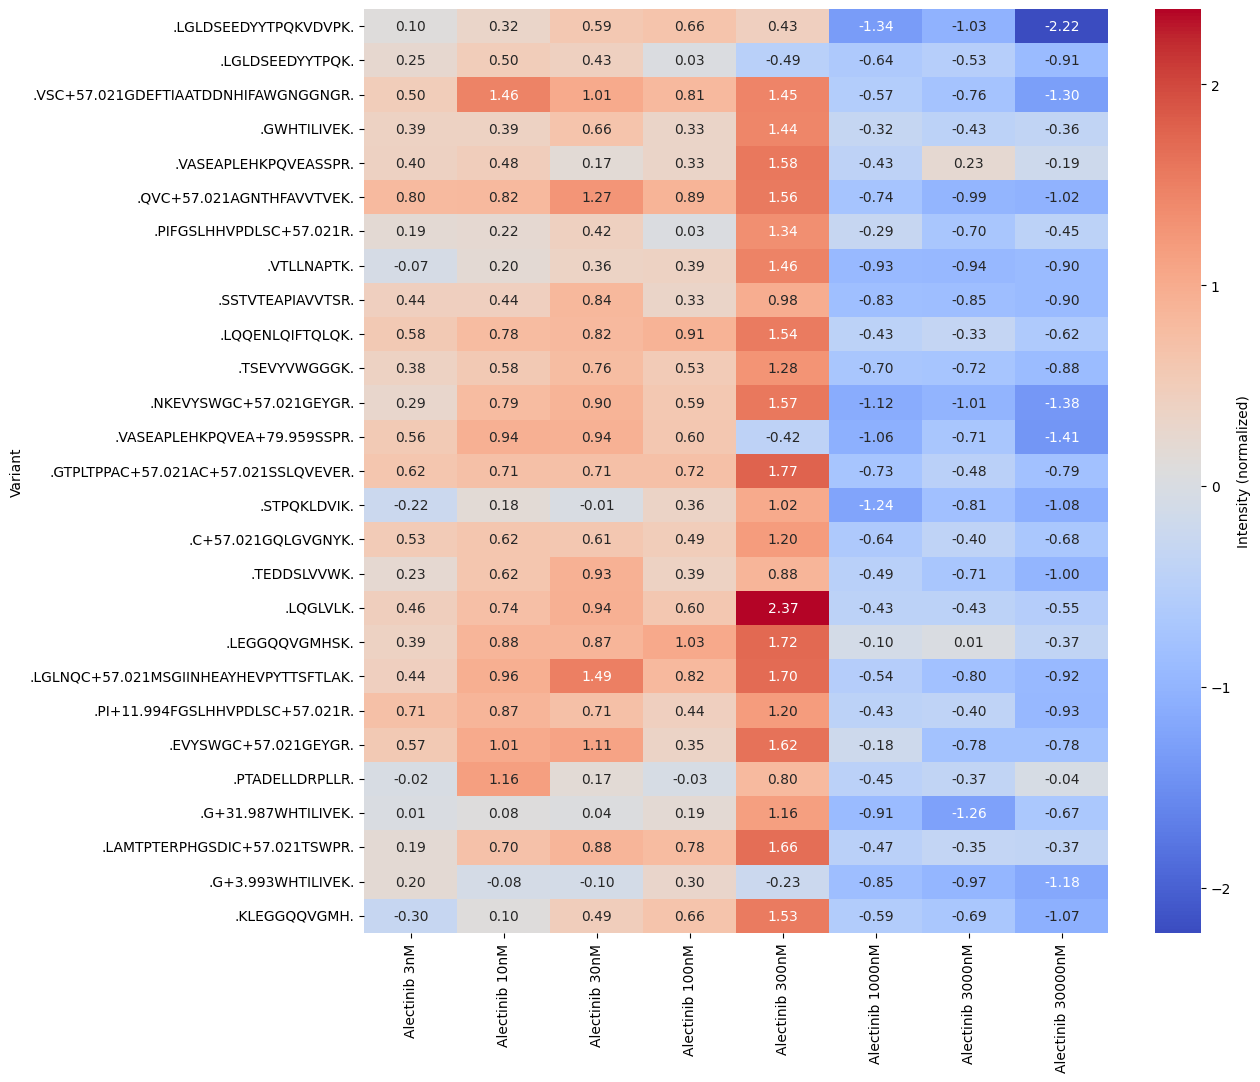

In [59]:
plt.figure(figsize=(12, 12))
sns.heatmap(
    df_target,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar_kws={"label": "Intensity (normalized)"},
)